# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

### Importing the training set

In [ ]:
dataset = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')


In [ ]:
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
dataset.shape

(43824, 13)

In [ ]:
dataset = dataset.dropna(how='any',axis=0) 

In [ ]:
dataset.shape

(41757, 13)

In [ ]:
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
from sklearn.model_selection import train_test_split

train_set, dataset_test = train_test_split(dataset, test_size=0.3, shuffle=False,)

In [ ]:
train_set

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,31147,2013,7,21,18,56.0,19,31.0,1004.0,SE,16.09,0,0
31147,31148,2013,7,21,19,48.0,19,29.0,1004.0,SE,17.88,0,0
31148,31149,2013,7,21,20,42.0,19,28.0,1004.0,SE,19.67,0,0
31149,31150,2013,7,21,21,50.0,21,27.0,1005.0,SE,20.56,0,0


In [ ]:
dataset_test

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
31151,31152,2013,7,21,23,54.0,21,24.0,1005.0,SE,22.34,0,0
31152,31153,2013,7,22,0,61.0,21,24.0,1005.0,SE,23.23,0,0
31153,31154,2013,7,22,1,73.0,20,25.0,1005.0,SE,26.36,0,0
31154,31155,2013,7,22,2,84.0,20,23.0,1004.0,SE,27.25,0,0
31155,31156,2013,7,22,3,92.0,20,22.0,1005.0,SE,28.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

### Creating a data structure with 120 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(120, 29228):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
910/910 [==============================] - 201s 221ms/step - loss: 0.0010
Epoch 2/20
910/910 [==============================] - 206s 227ms/step - loss: 8.7519e-04
Epoch 3/20
910/910 [==============================] - 203s 223ms/step - loss: 8.2786e-04
Epoch 4/20
910/910 [==============================] - 203s 223ms/step - loss: 8.0616e-04
Epoch 5/20
910/910 [==============================] - 203s 223ms/step - loss: 8.0654e-04
Epoch 6/20
910/910 [==============================] - 203s 223ms/step - loss: 8.0055e-04
Epoch 7/20
910/910 [==============================] - 202s 222ms/step - loss: 7.9718e-04
Epoch 8/20
910/910 [==============================] - 202s 222ms/step - loss: 7.9453e-04
Epoch 9/20
910/910 [==============================] - 202s 221ms/step - loss: 7.6295e-04
Epoch 10/20
910/910 [==============================] - 203s 223ms/step - loss: 7.7071e-04
Epoch 11/20
910/910 [==============================] - 203s 223ms/step - loss: 7.6192e-04
Epoch 12/20
910/910 [==

## Part 3 - Making the predictions and visualising the results

### Getting the pollution of the given test data

In [ ]:
real_pollution = dataset_test.iloc[:, 5:6].values

### Getting the predicted pollution

In [ ]:
dataset_total = pd.concat((train_set['pm2.5'], dataset_test['pm2.5']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 12647):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_pollution = regressor.predict(X_test)
predicted_pollution = sc.inverse_transform(predicted_pollution)

### Visualising the results

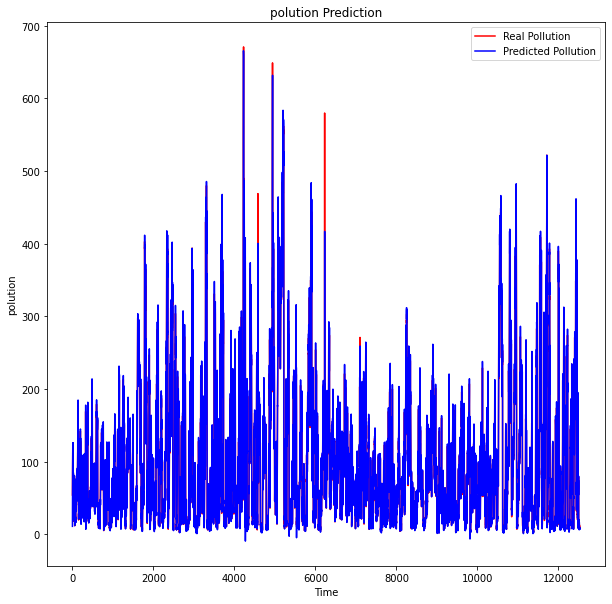

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(real_pollution, color = 'red', label = 'Real Pollution')
plt.plot(predicted_pollution, color = 'blue', label = 'Predicted Pollution')
plt.title('polution Prediction')
plt.xlabel('Time')
plt.ylabel('polution')
plt.legend()
plt.show()


In [ ]:
MSE_error = mean_squared_error(real_pollution, predicted_pollution)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 442.36086615974995
